In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [4]:
%matplotlib inline

In [5]:
data = datasets.fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
)

In [6]:
type(data)

tuple

In [7]:
len(data)

2

In [8]:
type(data[0]), type(data[1])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [9]:
data[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data[0].shape

(70000, 784)

In [11]:
data[1].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
pixel_values, targets = data
ftargets = targets.astype(int)

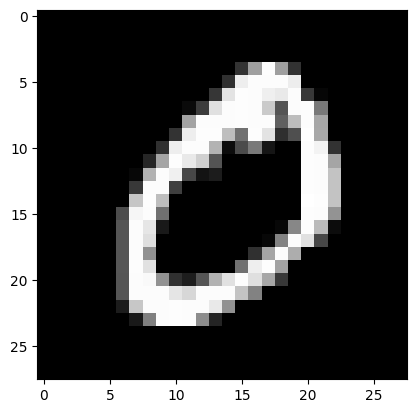

In [21]:
first_image = pixel_values.iloc[1, :].to_numpy().reshape(28, 28)
plt.imshow(first_image, cmap="gray")

In [22]:
manifold.TSNE?

Init signature:
manifold.TSNE(
    n_components=2,
    *,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate='auto',
    max_iter=None,
    n_iter_without_progress=300,
    min_grad_norm=1e-07,
    metric='euclidean',
    metric_params=None,
    init='pca',
    verbose=0,
    random_state=None,
    method='barnes_hut',
    angle=0.5,
    n_jobs=None,
    n_iter='deprecated',
)
Docstring:     
T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of 

In [23]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.loc[:3000, :])

In [27]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets.loc[:3000])),
    columns=["x", "y", "targets"],
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [28]:
tsne_df.head()

,x,y,targets
0,19.919054,-10.370852,5.0
1,56.684185,-0.320722,0.0
2,0.826746,-55.485161,4.0
3,-41.557041,11.136982,1.0
4,-9.546599,-34.120701,9.0


In [29]:
pixel_values.loc[:3000, :].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Each DF row is a 28x28 grayscale (0-256) image, pixel-by-pixel

(256,)

In [41]:
28 * 28

784

In [43]:
sns.FacetGrid?

Init signature:
sns.FacetGrid(
    data,
    *,
    row=None,
    col=None,
    hue=None,
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=False,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
)
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, but 

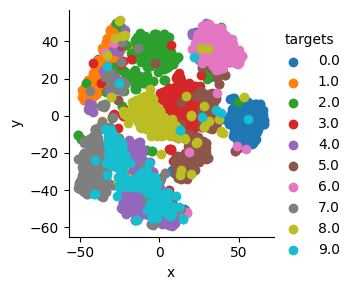

In [44]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()